<a href="https://colab.research.google.com/github/arju-gituser/Data-Warehousing-and-Mining/blob/main/Congress_vote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving house-votes-84_csv.csv to house-votes-84_csv.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['house-votes-84_csv.csv']))

In [3]:
import numpy as np

df.replace("?",np.nan, inplace=True)
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

[0.00517619 0.00174866 0.07405421 0.15951126 0.02763446 0.00676827
 0.01787351 0.01966524 0.048402   0.00211164 0.02068279 0.04320183
 0.01109667 0.03760673 0.01089257 0.00444314 0.50913084]


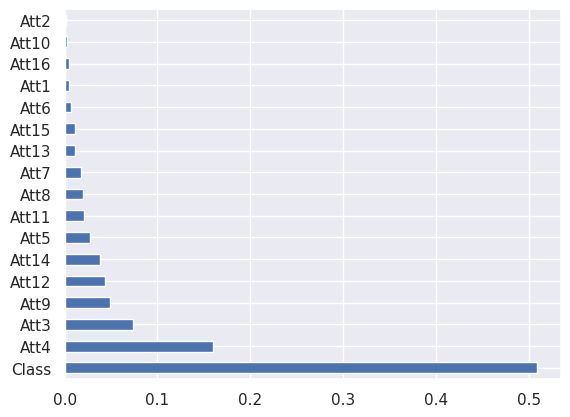

In [6]:
#Feature Importance
#Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.
#We can see that we are given an importance score for each attribute where the larger score the more important the attribute
#In the example below we construct a ExtraTreesClassifier classifier for the  dataset.
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
y1 = df['Class']

### Relf: 20,9,4,10,2,13,17,12,6,3,18,11,19,1,14,15,8,5,16,7 : 20
#GR: 20,9,8,17,4,10,11,2,7,1,12,3,19,6,15,14,13,5,16,18 : 20(numtonominal)
#Infogain: 20,9,4,8,10,2,17,1,7,11,3,12,6,14,19,5,13,15,16,18 : 20

#Mean: 20, 1,3, 12,10,7,6,11,15,18,5,13,16,19,2,14,4,9,17,8
#Mean2:20,9,4,8,10,2,17,12,11,,3,13,1,6,19,18,14,15,7,5,16(IG+RF+GR)
x12=df[['Att3','Att4','Att5','Att6','Att7','Att8','Att9','Att11','Att12','Att13','Att14','Att15']]

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(x12, y1, test_size=0.20, random_state=42)
# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

acc = [] # list to store all performance metric

from sklearn import metrics
def plot_confusion_metrix(Y_test,model_test):
    cm = metrics.confusion_matrix(Y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(Y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(Y_test, model_test))
   #cm = metrics.confusion_matrix(Y_test, model_test)
    plot_confusion_metrix(Y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,Y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(Y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu



Model 1: Random Forest

Best parameters set found on development set:
{'max_features': 'auto', 'n_estimators': 100}


Confusion Matrix:
[[56  0]
 [ 2 29]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.94      0.97        31

    accuracy                           0.98        87
   macro avg       0.98      0.97      0.97        87
weighted avg       0.98      0.98      0.98        87



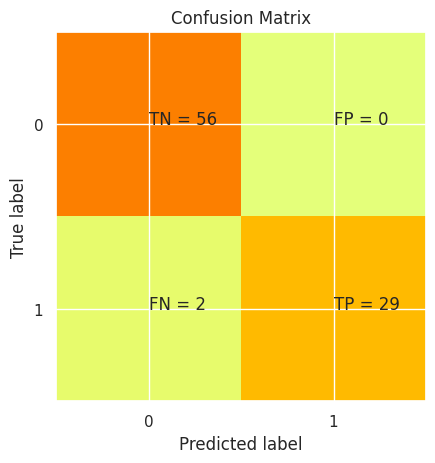

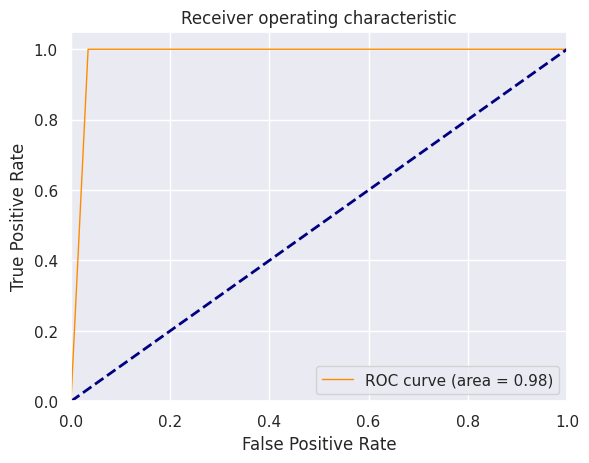


Acuuracy Of the Model:  0.9770114942528736 



Model 2: Random Forest

Best parameters set found on development set:
{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 300}


Confusion Matrix:
[[55  1]
 [ 2 29]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87



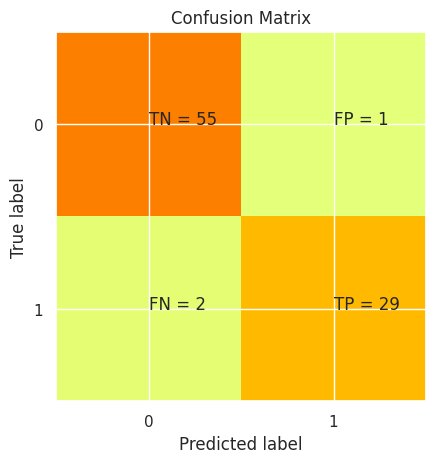

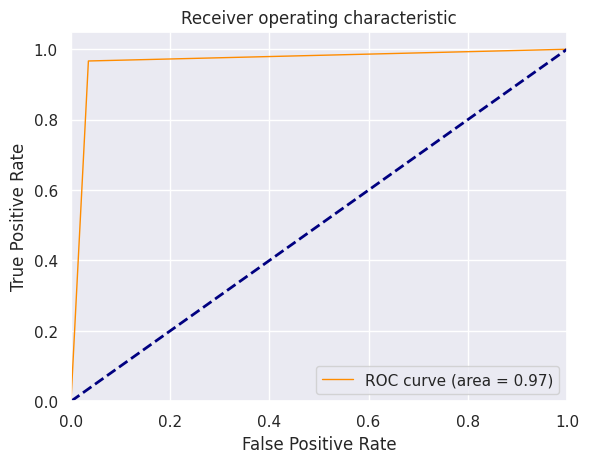


Acuuracy Of the Model:  0.9655172413793104 




In [17]:
from sklearn.model_selection import GridSearchCV
print("\nModel 1: Random Forest\n")
rfc=RandomForestClassifier(random_state=0)

#mpdel_1

param_grid = {
    'n_estimators': [100],
    'max_features': ['auto'],


}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring = 'roc_auc')
CV_rfc.fit(X_trainval, Y_trainval.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc)
roc_curves(CV_rfc)
accuracy(CV_rfc)

#mpdel_2
print("\nModel 2: Random Forest\n")

param_grid = {
    'n_estimators': [300],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],

}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring = 'roc_auc')
CV_rfc.fit(X_trainval, Y_trainval.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc)
roc_curves(CV_rfc)
accuracy(CV_rfc)


Model 1: Decision Tree



Confusion Matrix:
[[54  2]
 [ 3 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        56
           1       0.93      0.90      0.92        31

    accuracy                           0.94        87
   macro avg       0.94      0.93      0.94        87
weighted avg       0.94      0.94      0.94        87



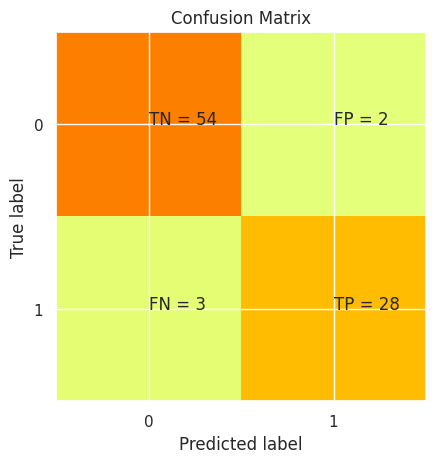

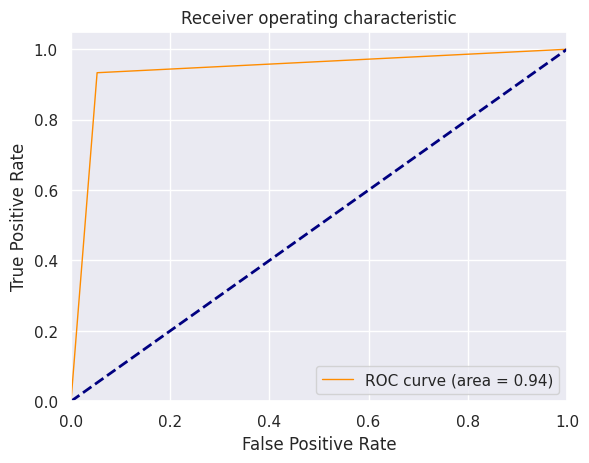


Acuuracy Of the Model:  0.9425287356321839 



Model 1: Decision Tree



Confusion Matrix:
[[54  2]
 [ 1 30]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.97      0.95        31

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87



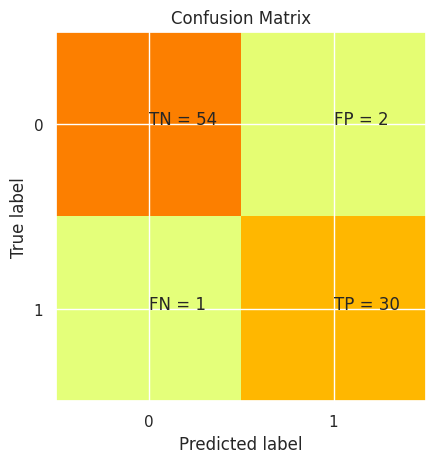

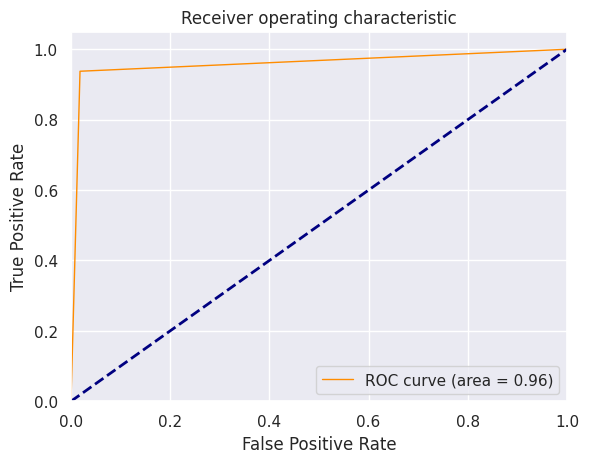


Acuuracy Of the Model:  0.9655172413793104 




In [20]:
print("\nModel 1: Decision Tree\n")
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_dtc.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_dtc)
roc_curves(clf_dtc)
accuracy(clf_dtc)

print("\nModel 2: Decision Tree\n")
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_dtc)
roc_curves(clf_dtc)
accuracy(clf_dtc)


Model 1: SVM



Confusion Matrix:
[[52  4]
 [ 0 31]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.89      1.00      0.94        31

    accuracy                           0.95        87
   macro avg       0.94      0.96      0.95        87
weighted avg       0.96      0.95      0.95        87



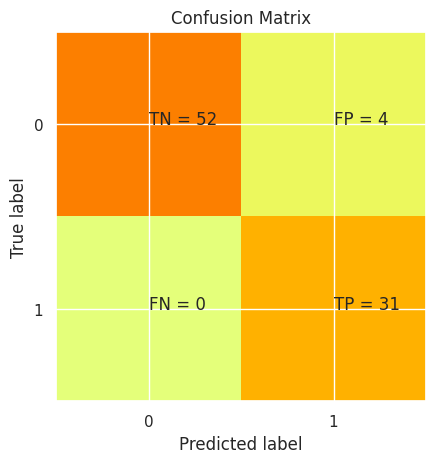

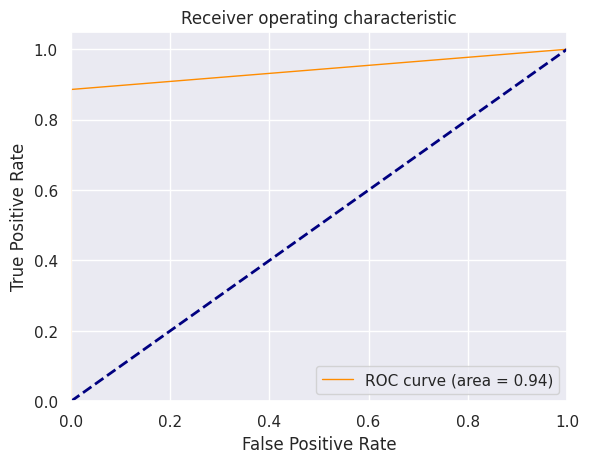


Acuuracy Of the Model:  0.9540229885057471 



Model 1: SVM



Confusion Matrix:
[[54  2]
 [ 9 22]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        56
           1       0.92      0.71      0.80        31

    accuracy                           0.87        87
   macro avg       0.89      0.84      0.85        87
weighted avg       0.88      0.87      0.87        87



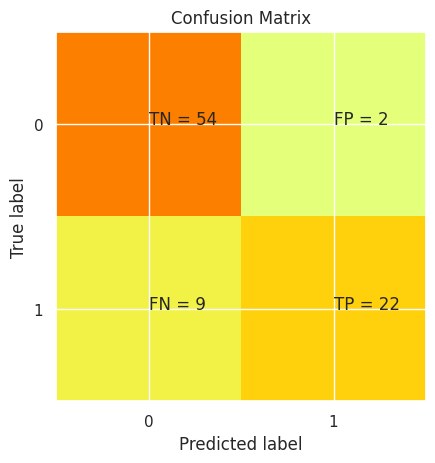

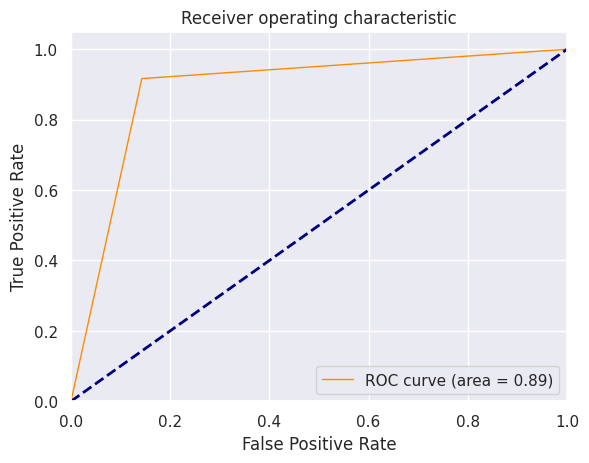


Acuuracy Of the Model:  0.8735632183908046 




In [23]:
print("\nModel 1: SVM\n")
svm = SVC(kernel="linear",C=0.5,random_state=0)
svm.fit(X_trainval, Y_trainval.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)

print("\nModel 1: SVM\n")
svm = SVC(kernel="sigmoid",C=0.5,random_state=0)
svm.fit(X_trainval, Y_trainval.ravel())
report_performance(svm)
roc_curves(svm)
accuracy(svm)


Model 1: Logistic Regression



Confusion Matrix:
[[55  1]
 [ 3 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.97      0.90      0.93        31

    accuracy                           0.95        87
   macro avg       0.96      0.94      0.95        87
weighted avg       0.95      0.95      0.95        87



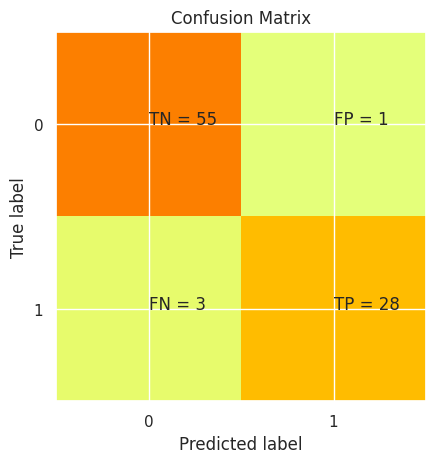

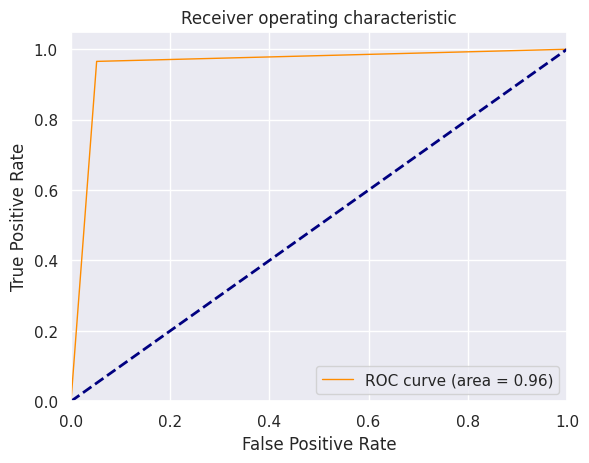


Acuuracy Of the Model:  0.9540229885057471 



Model 2: Logistic Regression



Confusion Matrix:
[[56  0]
 [ 3 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.90      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.95      0.96        87
weighted avg       0.97      0.97      0.97        87



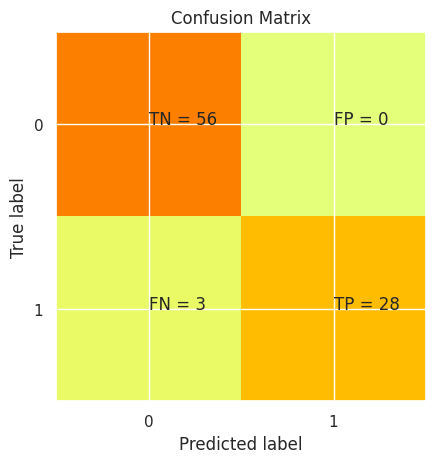

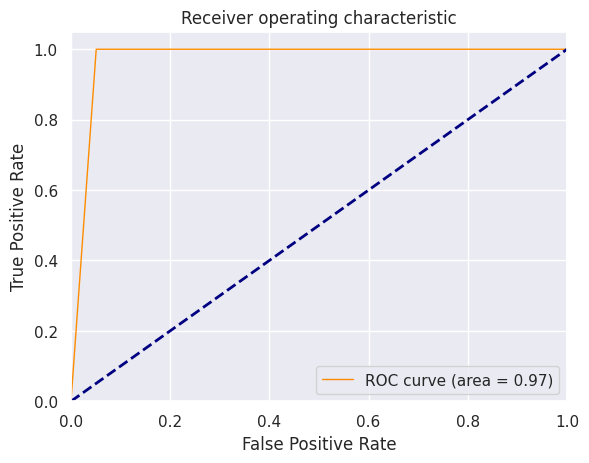


Acuuracy Of the Model:  0.9655172413793104 




In [29]:
print("\nModel 1: Logistic Regression\n")
clf_LR = LogisticRegression(penalty="l1",solver = "liblinear",random_state=0)
clf_LR.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_LR)
roc_curves(clf_LR)
accuracy(clf_LR)
print("\nModel 2: Logistic Regression\n")
clf_LR = LogisticRegression(penalty="l2",solver = "lbfgs",random_state=0)
clf_LR.fit(X_trainval, Y_trainval.ravel())
report_performance(clf_LR)
roc_curves(clf_LR)
accuracy(clf_LR)